In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
!pip install ydata-profiling

In [25]:
from ydata_profiling import ProfileReport

In [26]:
profile = ProfileReport(df, title="My Data Profiling Report", explorative=True)
profile.to_file("data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 57.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df = df.drop('CustomerID', axis=1)

In [28]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [32]:
X = df.iloc[:,[2,3]]

In [33]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##WCSS

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
 kmeans = KMeans(n_clusters=i)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

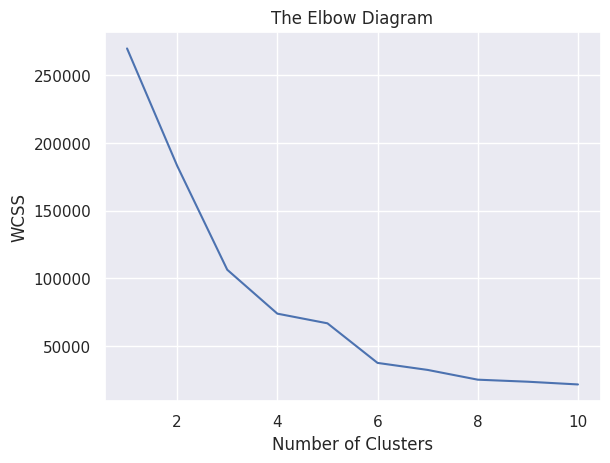

In [36]:
#elbow diagam
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
#optimized id 6
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.fit_predict(X))
Y = kmeans.fit_predict(X)

[[ 54.88607595  49.89873418]
 [ 86.53846154  82.12820513]
 [ 25.72727273  79.36363636]
 [ 26.30434783  20.91304348]
 [ 79.          16.59259259]
 [109.7         22.        ]]
[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1]
37455.98455516028
[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 5 3 5 2 5 3 5 3 5 2 5 3 5 3 5 3 5 3 5 2 5 3 5 3 5
 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 

Visualize

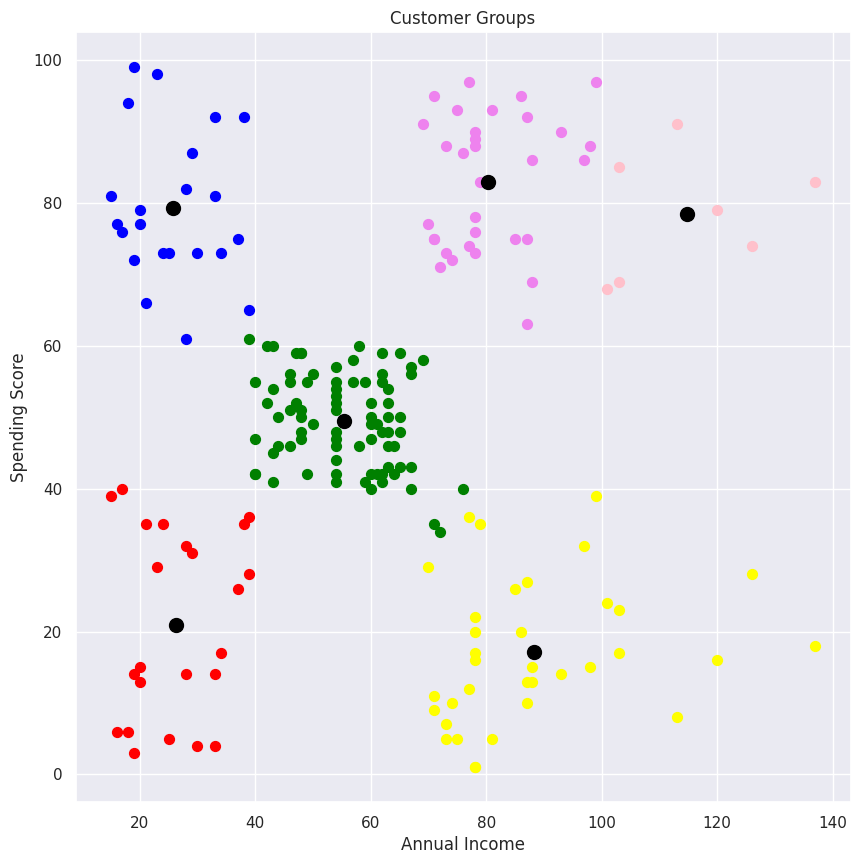

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X.loc[Y == 0, X.columns[0]], X.loc[Y == 0, X.columns[1]], s=50, c='red', label='Cluster 1')
plt.scatter(X.loc[Y == 1, X.columns[0]], X.loc[Y == 1, X.columns[1]], s=50, c='green', label='Cluster 2')
plt.scatter(X.loc[Y == 2, X.columns[0]], X.loc[Y == 2, X.columns[1]], s=50, c='pink', label='Cluster 3')
plt.scatter(X.loc[Y == 3, X.columns[0]], X.loc[Y == 3, X.columns[1]], s=50, c='yellow', label='Cluster 4')
plt.scatter(X.loc[Y == 4, X.columns[0]], X.loc[Y == 4, X.columns[1]], s=50, c='violet', label='Cluster 5')
plt.scatter(X.loc[Y == 5, X.columns[0]], X.loc[Y == 5, X.columns[1]], s=50, c='blue', label='Cluster 6')

#centriods
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [42]:
# optimized = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.fit_predict(X))
Y = kmeans.fit_predict(X)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
44448.45544793369
[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


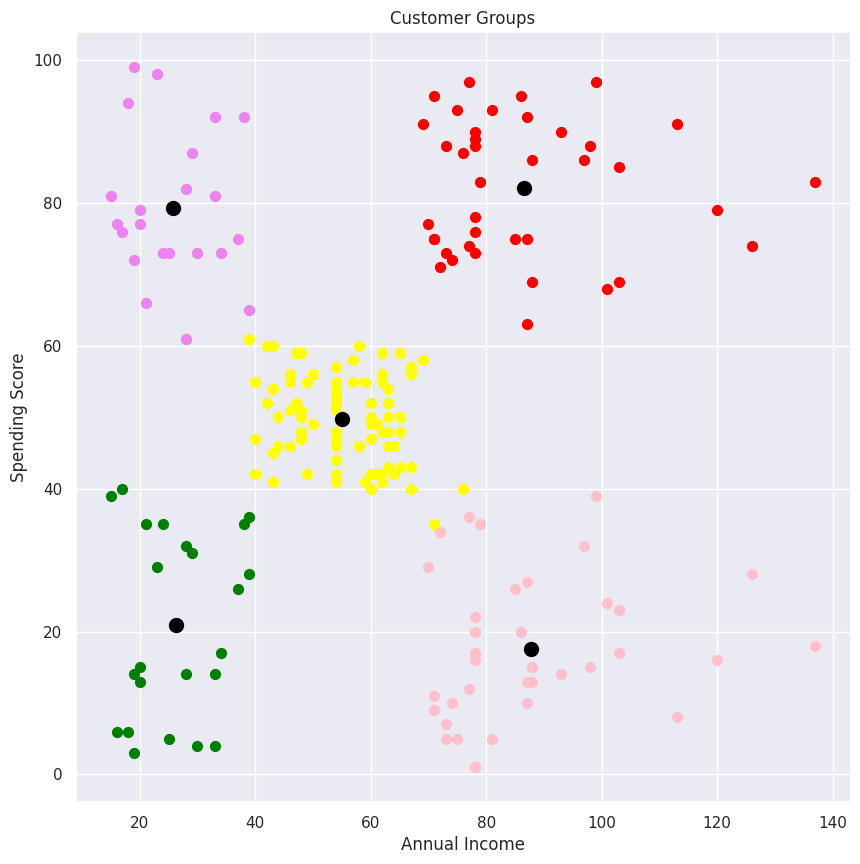

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(X.loc[Y == 0, X.columns[0]], X.loc[Y == 0, X.columns[1]], s=50, c='red', label='Cluster 1')
plt.scatter(X.loc[Y == 1, X.columns[0]], X.loc[Y == 1, X.columns[1]], s=50, c='green', label='Cluster 2')
plt.scatter(X.loc[Y == 2, X.columns[0]], X.loc[Y == 2, X.columns[1]], s=50, c='pink', label='Cluster 3')
plt.scatter(X.loc[Y == 3, X.columns[0]], X.loc[Y == 3, X.columns[1]], s=50, c='yellow', label='Cluster 4')
plt.scatter(X.loc[Y == 4, X.columns[0]], X.loc[Y == 4, X.columns[1]], s=50, c='violet', label='Cluster 5')

#centriods
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()